In [78]:
"""
Here we import all of the necessary functions and packages that we
won't be defining in our code. 
Sympy: a computer algebra package in python which allows us to perform
       algebraic manipulations easily.
Numpy: a package used for matrix algebra and basic mathematical functions
Matplotlib: a plotting packaged which allows us to make sick figures"""
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sympy.plotting import plot
from sympy.functions.elementary.exponential import exp
from sympy.functions.elementary.trigonometric import sin, cos, tan
from sympy.diffgeom import Manifold, Patch, CoordSystem
from sympy.diffgeom import metric_to_Riemann_components as Riemann
from sympy.diffgeom import metric_to_Ricci_components as Ricci
from sympy.diffgeom import metric_to_Christoffel_2nd as Christoffel
from sympy import latex
from IPython.display import display, Math
import sympy.diffgeom as diffgeom
from sympy.tensor.array import MutableDenseNDimArray as mArray

import scipy.optimize as opt
import scipy.integrate as integrate

In [2]:
def print_nonzero_christoffels(metric, component_list):
# given a metrix and a list of coordinates in the form ['t', 'x', 'y', 'z']
# prints out all of the non-zero Christoffel symbols in the form Gamma^c1_c2, c3
    print('********************** Christoffel Symbols **********************')
    christoffels = Christoffel(metric)
    size = len(component_list)
    for i in range(1):
        for j in range(size):
            for k in range(size):
                simplified = simplify(christoffels[i, j, k])
                if simplified != 0:
                    print(component_list[i] + ', ' + component_list[j] + ', ' + component_list[k] + ':   ')
                    display(Math(latex(simplified)))
                    print('---------------------------------')
    print('*****************************************************************')
    return;

def print_nonzero_riemann(R, component_list):
# R is the riemann tensor
# component list is the list of indices of R in the form ['t', 'x', 'y', 'z']
# prints out R^c1_c2,c3,c4
    print('************************* Riemann Tensor *************************')
    n = np.shape(R)[0]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                for q in range(n):
                    simplified = simplify(R[i, j, k, q])
                    if simplified != 0:
                        print(component_list[i] + ', ' + component_list[j] + ', ' + component_list[k] + ', '
                              + component_list[q] + ':   ')
                        display(Math(latex(simplify(simplified))))
                        print('---------------------------------')
    print('******************************************************************')
    return;

def print_nonzero_ricci(R, component_list):
# R is the Ricci tensor
# component list is the list of coordinates in the form ['t', 'x', 'y', 'z']
# prints out R_c1, c2
    print('************************* Ricci Tensor *************************')
    n = np.shape(R)[0]
    for i in range(n):
        for j in range(n):
            simplified = simplify(R[i, j])
            if simplified != 0:
                print(component_list[i] + ', ' + component_list[j])
                display(simplified)
                print('---------------------------------')
    print('******************************************************************')
    return;

def print_ricci_scalar(g):
# finds and prints the Ricci scalar
    R = Ricci(g)
    metric_matrix = diffgeom.twoform_to_matrix(g)
    metric_inv = metric_matrix.inv()
    ricci_scalar = 0
    for i in range(np.shape(R)[0]):
        for j in range(np.shape(R)[0]):
            ricci_scalar += metric_inv[i, j] * R[i, j]
    print('************************** Ricci Scalar **************************')
    display(Math(latex(simplify(ricci_scalar))))
    print('******************************************************************')
    return;

def get_ricci_scalar(g):
# finds and prints the Ricci scalar
    R = Ricci(g)
    metric_matrix = diffgeom.twoform_to_matrix(g)
    metric_inv = metric_matrix.inv()
    ricci_scalar = 0
    for i in range(np.shape(R)[0]):
        for j in range(np.shape(R)[0]):
            ricci_scalar += metric_inv[i, j] * R[i, j]

    return ricci_scalar;

def print_nonzero_einstein(metric, component_list):
    ricci_tensor = Ricci(metric)
    ricci_scalar = get_ricci_scalar(metric)
    metric_matrix = diffgeom.twoform_to_matrix(metric)
    term1 = ricci_tensor 
    term2 = - Rational(1 / 2) * metric * ricci_scalar
    #einstein = term1 + term2
    display(Math(latex(simplify(term1))))
    display(Math(latex(simplify(term2))))
    #print('************************* Einstein Tensor *************************')
    #for i in range(np.shape(einstein_tensor)[0]):
    #    for j in range(np.shape(einstein_tensor[1])):
    #        
    #print('*******************************************************************')

In [3]:
## Schwarzschild Metric
t, r, theta, phi, M, c = symbols('t, r, theta, phi, M, c')
m = Manifold('M', 4)
patch = Patch('P', m)
coords = CoordSystem('coords', patch, ['t', 'r', 'theta', 'phi'])
t, r, theta, phi = coords.coord_functions()
dt, dr, dtheta, dphi = coords.base_oneforms()

# make my metric
TP = diffgeom.TensorProduct
metric = - (1 - 2 * M / r) * c**2 * TP(dt, dt) + (1 / (1 - 2 * M / r)) * TP(dr, dr) + r**2 * TP(dtheta, dtheta) + r**2 * sin(theta)**2 * TP(dphi, dphi)
components = ['t', 'r', 'theta', 'phi']
print_nonzero_christoffels(metric, components)
#print_nonzero_riemann(Riemann(metric), components)
#print_nonzero_ricci(Ricci(metric), components)
#print_ricci_scalar(Ricci(metric), metric)
#print_nonzero_einstein(metric, components)

********************** Christoffel Symbols **********************
t, t, r:   


<IPython.core.display.Math object>

---------------------------------
t, r, t:   


<IPython.core.display.Math object>

---------------------------------
*****************************************************************


## Shape of Orbits in the Schwarzschild Geometry
This is a Jupyter Notebook to compute and display the shapes of orbits in a Schwarzschild geometry. We're going to be computing the orbit of a particle around a black-hole-esque object. The Schwarzschild radial coordinate is measured in units of $M$ so that $M=1$ in the following formulae. Throughout the variable $u = 1/r$ is used. Here is a list of what you must set to run the program:

1. The angular momentum: $\ell$
2. The energy parameter: $\epsilon = (e^2 - 1) / 2$
3. The starting radius for an orbit which is not bound: *rst.*
4. The number of orbits to be computed if the orbit is bound: *norbit*

These are set by editing the definition statements at various places in the program **You must be sure these parameters are set so the orbit is classically allowed and doesn't tart at a position where the value of the effective potential is grater than $\epsilon$**.

We'll run through all the basics of this program, and then we'll mess around with the paramters to see what's up with different values of energy and angular momentum.

### The Potential
The effective potential for radial motion $V_{eff}$ given by (9.28) is here denoted simply by $V$. To be slightly more general, a parameter **signewt** is introduced which multiplies the non-Newtonian $1/r^2$ term in the potential. Set it equal to $1$ for general relativity $0$ for a Newtonian $1/r$ potential, and an appropriate value for Newtonian $1/r$ potential with an additional quadrupole moment term.

We'll get you started by defining signewt for GR and then defining an effective potential below.

In [1]:
# define signewt
signewt = 1.0

In [2]:
# define the effective potential
def V(u, ell):
    return -u + ell**2 * u**2 / 2.0 - signewt * ell**2 * u**3;

### Specifying the Orbit
It takes four numbers to specify an orbit: (1) angular momentum $\ell$, (2) energy $\epsilon$, (3) starting radius $rst$, and (4) the number of orbits to be calculated $norbit$.

Let's specify the angular momentum below. Try defining a variable `ell` for angular momentum as equal to `5.0`.

In [48]:
ell = 5.0

Now we plot the effective potential as a function of $r / M$ for the specified value of $\ell$. Use bounds on the radius of $[2, 80]$ and $1000$ points. Remember that we've implicitly define $M = 1$.

In the box below define an array of $r$ values and then find the corresponding $V$ values. Finally plot these values using `plt.plot()`.

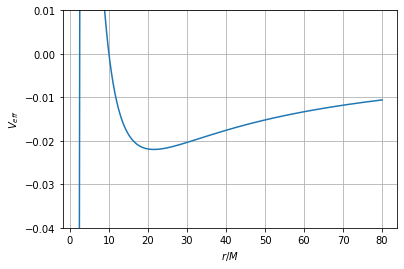

In [49]:
rvals = np.linspace(2, 80, 1000)
# recall that M is defined to be 1
Vvals = np.zeros(np.shape(rvals))

for i in range(np.size(rvals)):
    Vvals[i] = V(1/rvals[i], ell)
    
plt.plot(rvals, Vvals)
plt.xlabel(r'$r / M$')
plt.ylabel(r'$V_{eff}$')
plt.grid('on')
plt.ylim((-0.04, 0.01))
plt.show()

Now we want to find the values of the potential at the extrema. To do this, define a function `dV` which gives the derivative of $V$ at a given piont. Define `dV` as a function of `u = 1/r` and then plot the function for the values of `r` given above.

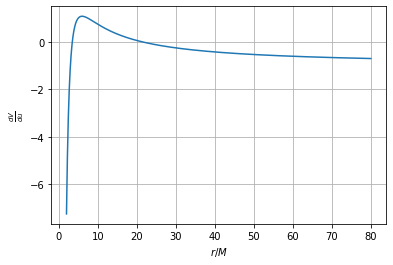

In [50]:
# Define the derivative function
def dV(u):
    return -1 + ell**2 * u - 3 * signewt * ell**2 * u**2;

dVvals = np.zeros(np.shape(rvals))
for i in range(np.size(rvals)):
    dVvals[i] = dV(1 / rvals[i])

plt.plot(rvals, dVvals)
plt.xlabel(r'$r / M$')
plt.ylabel(r'$\frac{dV}{du}$')
plt.grid('on')
plt.show()

Now we are going to use this to solve for the extrema using a python package function called `opt.fsolve(function, [initial guesses])`. We need to give `fsolve` some initial guesses which we can take from the plot of $dV$ above. Remember that `dV` is plotted against $r$ but takes $1/r$ as an argument, so our guesses need to be in terms of $1/r$. Using the format above, find the u coordinates of the extrema and print them out. You'll need to use the line `maxmin = opt.fsolve(dV, uguess)` where `uguess` is a list of two values you can guess from your plot above.

In [56]:
uguess = np.array([1 / 3.0, 1 / 30.0])
maxmin = opt.fsolve(dV, uguess)

print(maxmin[0], maxmin[1])

0.2868517091822027 0.046481624151364205


Now that we've found the extrema $u$ values, we can find the actual extreme values of $V$. Use the function `V` defined above and the `maxmin` values you found to define and then print the extreme values of $V$. Do these things in the box below.

In [53]:
Vmax = V(maxmin[0], ell)
Vmin = V(maxmin[1], ell)

print(Vmax, Vmin)

0.15161512329820703 -0.021985493668577518


Now we are going to specify the energy of an orbiting object. In order to have a classically allowed orbit, the energy parameter must be larger than the minimum value of $V$ you found above. We also want the orbit to be bound, so we need to have the energy by less than $0$.

In the box below, define a new variable `epsilon` for the energy that has a physically appropriate value.

In [68]:
epsilon = -0.01

To check that we have appropriate values for energy, let's plot the values of `V` and the value of `epsilon` below. You can use the same plot code for `V` from above, you'll just need to add in a plot line which plots the constant `epsilon`.

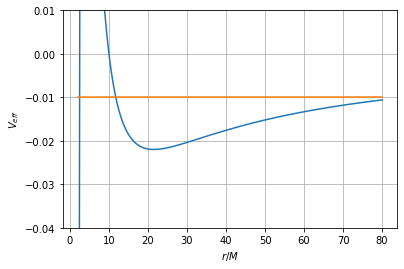

In [69]:
rvals = np.linspace(2, 80, 1000)
# recall that M is defined to be 1
Vvals = np.zeros(np.shape(rvals))

for i in range(np.size(rvals)):
    Vvals[i] = V(1/rvals[i], ell)
    
plt.plot(rvals, Vvals)
plt.plot([2, 80], [epsilon, epsilon])
plt.xlabel(r'$r / M$')
plt.ylabel(r'$V_{eff}$')
plt.grid('on')
plt.ylim((-0.04, 0.01))
plt.show()

You should be able to see with this plot that $V$ will intersect the constant `epsilon` at three points. These are our three points of interest, so let's use the same `fsolve` function from above to find where these intersections occur.

Importantly, `fsolve` finds where a function is equal to zero. What change do we need to make to $V$ to use `fsolve` to find intersections with `epsilon`? Define a new function `V_adjusted` as a function of `u` which will serve this purpose.

After you've defined this function, use `fsolve` and an array of three guesses to find the points of intersection. Then print out these points.

In [70]:
def V_adjusted(u):
    return -u + ell**2 * u**2 / 2.0 - signewt * ell**2 * u**3 - epsilon;

uguess = np.array([1 / 2.5, 1 / 13.0, 1 / 50.0])
intersections = opt.fsolve(V_adjusted, uguess)
print(intersections)
print(1 / intersections)

[0.40327064 0.08506962 0.01165974]
[ 2.47972427 11.75507823 85.76519777]


We've now specified the angular momentum and the energy. Next we'll specify a starting radius for our orbiting particle. Here we'll want to use a starting radius of $20.0$, so in the box below, define a starting radius `rst` equal to $20.0$ and then a corresponding initial value of $u$, `ust`.

In [72]:
rst = 20.0
ust = 1 / rst

Finally, we need to define the last needed parameter for our program, `norbits`. We need to calculate at least 2 orbits to see that the orbit is actually an orbit, so let's just go ahead and say 3. Define a new variable `norbits` below, and set it equal to 3.

In [73]:
norbit = 3.0

### Computing the Schwarzschild Orbits for Our Particle

The following bits of code uses a bit more background than you've got from the two hours you've been programming, so a lot of them will be predefined for you.

Now we are going to numerically determine the orbit of our particle around a black-hole-eque object. We will be performing the following integral:

$$ \int \frac{\ell}{\sqrt{2(\epsilon - V)}} du$$

Notice that when $\epsilon = V$ the integrand diverges. To dodge this problem, we'll define a parameter $eps$ which will determine how close the integrand can get to this divergent part.

In [84]:
eps = 1.0e-8

Next we need to write a program that picks the appropriate radii to start and end the integration of the orbit given the energy and starting radius defined above. There are are four types of orbits:

1. Bound orbits which start at the outer turning point.
2. Orbits which come in from infinity and go out again. These start at rst.
3. Orbits which start close to $r = 2M$ (the Schwarzschild radius) and fall back to it.
4. Plunge orbits which start at rst and end at $r = 2M$.

The following lines test what type of orbit we are dealing with.

In [85]:
if epsilon < 0 and ust < intersections[1]:
    print('Case 1')
    u1 = intersections[2] * (1 + eps)
    u2 = intersections[1] * (1 - eps)
    
elif epsilon > 0 and epsilon < Vmax and ust < intersections[1]:
    print('Case 2')
    u1 = ust
    u2 = intersections[1] * (1 - eps)

elif epsilon > Vmax and ust > intersections[2]:
    print('Case 3')
    u1 = 0.5
    u2 = intersections[0] * (1 + eps)

elif epsilon > Vmax:
    print('Case 4')
    u1 = ust
    u2 = 0.5 * (1 - eps)
    
print(u1, u2)

Case 1
0.011659741199944082 0.08506961587939317


Next we are going to define a function which integrates the angle `theta` swept out from the innermost turning point of the particle orbit. This function utilizes a numerical integration function within python.

In [89]:
def integrand(u, ell, epsilon):
    return ell / np.sqrt(2 * epsilon - 2 * V(u, ell))

def theta(u, epsilon, ell, u1):
    return integrate.quad(integrand, u1, u, args=(ell, epsilon))[0]

Now we define a variable `delphi` which is the total angle `theta` swept out bewteen two endpoints of the orbit.

Use the function `theta` above and the parameters for `epsilon, u2, ell, and u1` defined above to define and find `delphi` in the box below. Print out the value you find.

In [92]:
delphi = theta(u2, epsilon, ell, u1)
print(delphi)

3.7364007962032155


Now we're going to define some new functions.

In [127]:
# write a function that returns the rounded integer of a float z
def n(z):
    return int(z);

# write a function that returns the decimal of an integer z
def zf(z):
    return z - int(z);

def ua(z):
    return u1 * (1 - 2 * zf(z)) + u2 * 2 * zf(z);

def ub(z):
    return u1 * (2 * zf(z) - 1) + 2 * u2 * (1 - zf(z));

def u(z):
    if zf(z) < 0.5:
        return ua(z);
    else:
        return ub(z);

def phia(z):
    return 2 * n(z) * delphi + theta(u(z), epsilon, ell, u1);

def phib(z):
    return 2 * n(z) * delphi - theta(u(z), epsilon, ell, u1);

def accphi(z):
    if zf(z) < 0.5:
        return phia(z);
    else:
        return phib(z) + 2 * np.pi;

def xpoints(z):
    return np.cos(accphi(z)) / u(z);

def ypoints(z):
    return np.sin(accphi(z)) / u(z);

### Displaying Orbits

`accphi` defined above is the accumulated angle as a function of position along the orbit, as measured by the parameter z (also define above) to vary from `0` to `norbit` so that $z=1$ is the end of the first orbit, $z=2$ is the end of the second orbit, etc..

Below, write an if statement that will define `norbit` to be equal to `norbit` if the orbit is bound (use the if statement for case 1 above) and set it to `1` if it isn't bound.

In [128]:
if epsilon < 0 and ust < intersections[1]:
    norbit = norbit

else:
    norbit = 1

Now write an if statement which defines `norbit` to `0.5` if the orbit is a plunge orbit. Again you can use the if statement from Case 4 from above.

In [129]:
if epsilon > Vmax:
    norbit = 0.5

Finally, write an if statement which will plot `accphi(z)` from z=0 to z=1 if `norbit` is greater than `0.9999`.

/Users/wentmich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  """


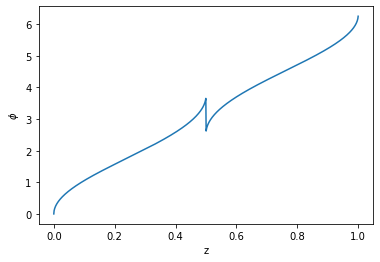

In [130]:
if norbit > 1:
    zvals = np.linspace(0, 0.9999, 1000)
    accvals = np.zeros(np.shape(zvals))
    
    for i in range(np.size(zvals)):
        accvals[i] = accphi(zvals[i])
    
    plt.plot(zvals, accvals)
    plt.xlabel('z')
    plt.ylabel(r'$\phi$')
    plt.show()

Now make a plot of `accphi` from `z=0` to `z = norbit - 1e-6`.

/Users/wentmich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  """


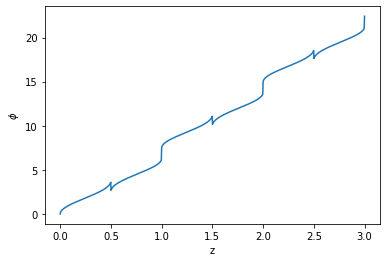

In [131]:
zvals = np.linspace(0, norbit, 1000)
accvals = np.zeros(np.shape(zvals))
    
for i in range(np.size(zvals)):
    accvals[i] = accphi(zvals[i])
    
plt.plot(zvals, accvals)
plt.xlabel('z')
plt.ylabel(r'$\phi$')
plt.show()

Calculating and plotting the orbit: Two parameters specify how accurately the orbit is calculated: `PlotDivision` specifies the number of plot points, `MaxBend` specifies the maximum bending angle permitted.

For shorter calculations and rougher orbits decrease `PlotDivision` and increase `MaxBend`. For longer calculations and more accurate orbits, increase `PlotDivision` and decrease `MaxBend`.

The final step here is to plot the orbits actual positions rather than angular positions. 

Write some code that plots `xpoints` and `ypoints` for the z values defined above.

/Users/wentmich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  """


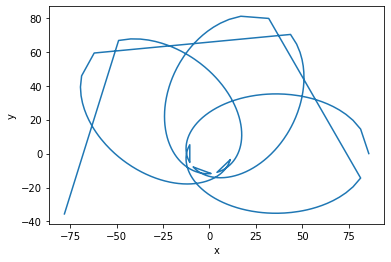

In [133]:
xvals = np.zeros(np.shape(zvals))
yvals = np.zeros(np.shape(zvals))

for i in range(np.size(zvals)):
    xvals[i] = xpoints(zvals[i])
    yvals[i] = ypoints(zvals[i])

plt.plot(xvals, yvals)
#plt.axes().set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()